Promedio de satisfacción por ciudad: Ciudad
Barcelona    5.00
Madrid       4.75
Portugal     4.00
Valencia     3.00
Name: Satisfacción Cliente, dtype: float64

 Promedio Compradores por Genero: Genero Comprador
F     76.0
M    166.0
Name: Unidades Vendidas, dtype: float64


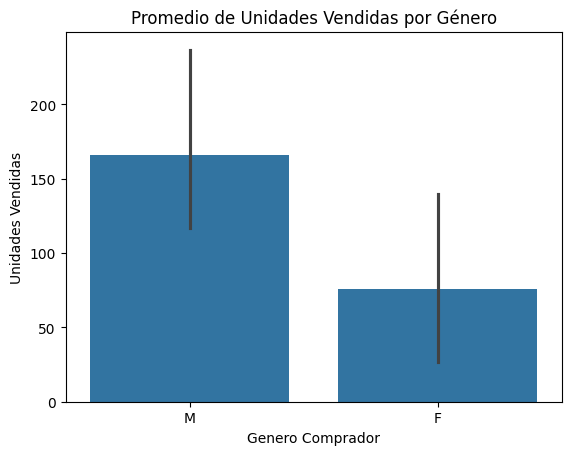

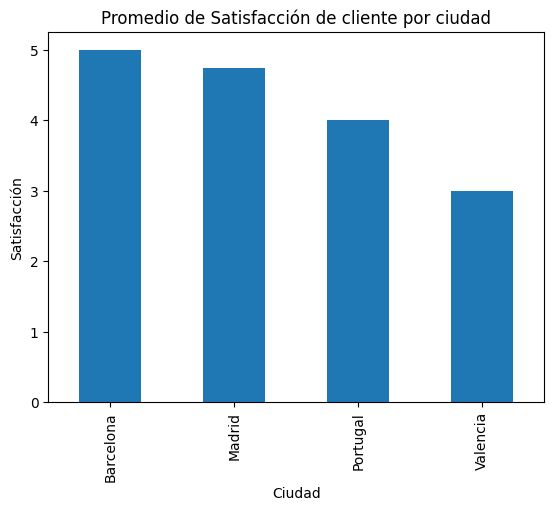

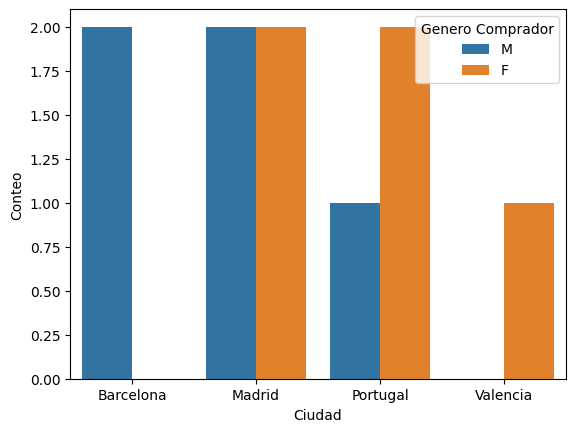

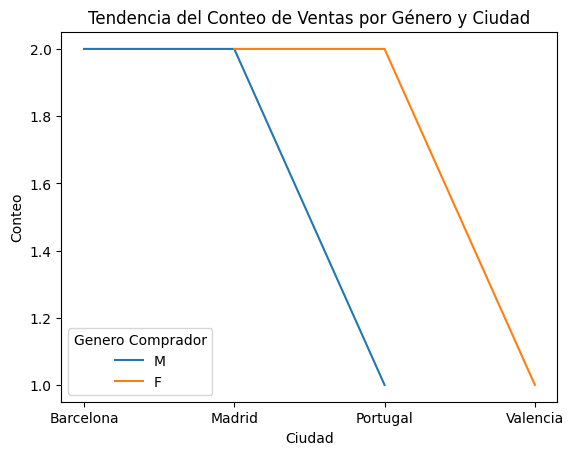

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

producto = ['Laptop', 'Smartphone', 'Audifonos', 'Monitor', 'Teclado', 'Mouse']
ciudades = ['Madrid', 'Barcelona', 'Portugal', 'Valencia',]
generos = ['F', 'M']
num_datos = 10

datos_ventas = {
    'Producto': np.random.choice(producto, num_datos),
    'Precio': np.random.randint(50, 2000, num_datos),
    'Unidades Vendidas': np.random.randint(1, 300, num_datos),
    'Ciudad': np.random.choice(ciudades, num_datos),
    'Genero Comprador': np.random.choice(generos, num_datos),
    'Satisfacción Cliente': np.random.randint(1, 10, num_datos)
}

df_ventas = pd.DataFrame(datos_ventas)

df_ventas['Total Ventas'] = df_ventas['Precio'] * df_ventas['Unidades Vendidas']
#df_ventas = df_ventas.sort_values(by=['Unidades Vendidas'], ascending=True)
#print(df_ventas)

df_ventas.to_csv('datos_ventas.csv')

#Promedio de satisfacción de clinete para cada ciudad

# Agrupa el DataFrame por la columna ciudad.
ciudades_agrupadas = df_ventas.groupby('Ciudad')
# Selecciona la columna ['Satisfacción Cliente'] y calcula el promedio de los valOores de la columna con mean()
promedio_satisfaccion = ciudades_agrupadas['Satisfacción Cliente'].mean()
print(f'Promedio de satisfacción por ciudad: {promedio_satisfaccion}')

#Promedio de unidades vendidas para compradores femeninos y masculinos

promedio_compradores = df_ventas.groupby(['Genero Comprador'])['Unidades Vendidas'].mean()
print(f'\n Promedio Compradores por Genero: {promedio_compradores}')


#CREANDO GRAFICOS

sns.barplot(x = 'Genero Comprador', y = 'Unidades Vendidas', data = df_ventas)
plt.title('Promedio de Unidades Vendidas por Género')
plt.show()

promedio_satisfaccion.plot(kind='bar')
plt.title('Promedio de Satisfacción de cliente por ciudad')
plt.ylabel('Satisfacción')
plt.show()

conteo_genero_ciudad = df_ventas.groupby(['Ciudad','Genero Comprador']).size().reset_index(name='Conteo')
sns.barplot(x = 'Ciudad', y = 'Conteo', hue='Genero Comprador', data = conteo_genero_ciudad)
plt.show()

# CORRECCIÓN para plot (graficar líneas)
sns.lineplot(x='Ciudad', y='Conteo', hue='Genero Comprador', data=conteo_genero_ciudad)
plt.title('Tendencia del Conteo de Ventas por Género y Ciudad')
plt.show()

